In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests as re
from tqdm import tqdm
import time
import os

import nba_api
from nba_api.live.nba.endpoints import scoreboard
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from mar_designs import tidy_axes

In [2]:
# Variables for the notebook
facecolor = "#F7F5F2"
figsize=(11,6)
subplotFigsize=(28,6)
titlesize=16
labelsize=14

pd.set_option('display.max_columns', None)

## Look at all endpoints in nba_api.stats

In [3]:
help(nba_api.stats.endpoints)

Help on package nba_api.stats.endpoints in nba_api.stats:

NAME
    nba_api.stats.endpoints

PACKAGE CONTENTS
    _base
    alltimeleadersgrids
    assistleaders
    assisttracker
    boxscoreadvancedv2
    boxscoreadvancedv3
    boxscoredefensivev2
    boxscorefourfactorsv2
    boxscorefourfactorsv3
    boxscorehustlev2
    boxscorematchupsv3
    boxscoremiscv2
    boxscoremiscv3
    boxscoreplayertrackv2
    boxscoreplayertrackv3
    boxscorescoringv2
    boxscorescoringv3
    boxscoresummaryv2
    boxscoretraditionalv2
    boxscoretraditionalv3
    boxscoreusagev2
    boxscoreusagev3
    commonallplayers
    commonplayerinfo
    commonplayoffseries
    commonteamroster
    commonteamyears
    cumestatsplayer
    cumestatsplayergames
    cumestatsteam
    cumestatsteamgames
    defensehub
    draftboard
    draftcombinedrillresults
    draftcombinenonstationaryshooting
    draftcombineplayeranthro
    draftcombinespotshooting
    draftcombinestats
    drafthistory
    fantasywidget
 

## $\bf{All\space time\space leaders}$ endpoint

In [4]:
import nba_api.stats.endpoints.alltimeleadersgrids as atlg

In [5]:
# Request endpoint and get data into a large dictionary
allTimes = atlg.AllTimeLeadersGrids()
data = allTimes.get_dict()

In [6]:
# Print categories of leaders
allTimeDicts = data["resultSets"]
for i, d in enumerate(allTimeDicts):
    print(i, d["name"])

0 GPLeaders
1 PTSLeaders
2 ASTLeaders
3 STLLeaders
4 OREBLeaders
5 DREBLeaders
6 REBLeaders
7 BLKLeaders
8 FGMLeaders
9 FGALeaders
10 FG_PCTLeaders
11 TOVLeaders
12 FG3MLeaders
13 FG3ALeaders
14 FG3_PCTLeaders
15 PFLeaders
16 FTMLeaders
17 FTALeaders
18 FT_PCTLeaders


In [7]:
# Points scored
pointsLeadersIDs = [l[0] for l in allTimeDicts[1]["rowSet"]]

allTimeDicts[1]

{'name': 'PTSLeaders',
 'headers': ['PLAYER_ID', 'PLAYER_NAME', 'PTS', 'PTS_RANK', 'IS_ACTIVE_FLAG'],
 'rowSet': [[2544, 'LeBron James', 41995, 1, 'Y'],
  [76003, 'Kareem Abdul-Jabbar', 38387, 2, 'N'],
  [252, 'Karl Malone', 36928, 3, 'N'],
  [977, 'Kobe Bryant', 33643, 4, 'N'],
  [893, 'Michael Jordan', 32292, 5, 'N'],
  [1717, 'Dirk Nowitzki', 31560, 6, 'N'],
  [76375, 'Wilt Chamberlain', 31419, 7, 'N'],
  [201142, 'Kevin Durant', 30537, 8, 'Y'],
  [406, "Shaquille O'Neal", 28596, 9, 'N'],
  [2546, 'Carmelo Anthony', 28289, 10, 'N']]}

In [8]:
# Assists made
assistsLeadersIDs = [l[0] for l in allTimeDicts[2]["rowSet"]]

allTimeDicts[2]

{'name': 'ASTLeaders',
 'headers': ['PLAYER_ID', 'PLAYER_NAME', 'AST', 'AST_RANK', 'IS_ACTIVE_FLAG'],
 'rowSet': [[304, 'John Stockton', 15806, 1, 'N'],
  [101108, 'Chris Paul', 12444, 2, 'Y'],
  [467, 'Jason Kidd', 12091, 3, 'N'],
  [2544, 'LeBron James', 11534, 4, 'Y'],
  [959, 'Steve Nash', 10335, 5, 'N'],
  [349, 'Mark Jackson', 10334, 6, 'N'],
  [77142, 'Magic Johnson', 10141, 7, 'N'],
  [600015, 'Oscar Robertson', 9887, 8, 'N'],
  [201566, 'Russell Westbrook', 9885, 9, 'Y'],
  [78318, 'Isiah Thomas', 9061, 10, 'N']]}

In [9]:
# Merge lists and remove duplicates
leaderIDs = list(set(assistsLeadersIDs + pointsLeadersIDs))

In [10]:
# Rebound leaders
allTimeDicts[6]

{'name': 'REBLeaders',
 'headers': ['PLAYER_ID', 'PLAYER_NAME', 'REB', 'REB_RANK', 'IS_ACTIVE_FLAG'],
 'rowSet': [[76375, 'Wilt Chamberlain', 23924, 1, 'N'],
  [78049, 'Bill Russell', 21620, 2, 'N'],
  [76003, 'Kareem Abdul-Jabbar', 17440, 3, 'N'],
  [76979, 'Elvin Hayes', 16279, 4, 'N'],
  [77449, 'Moses Malone', 16212, 5, 'N'],
  [1495, 'Tim Duncan', 15091, 6, 'N'],
  [252, 'Karl Malone', 14968, 7, 'N'],
  [305, 'Robert Parish', 14715, 8, 'N'],
  [708, 'Kevin Garnett', 14662, 9, 'N'],
  [2730, 'Dwight Howard', 14627, 10, 'N']]}

In [11]:
# Field goals made leaders
allTimeDicts[8]

{'name': 'FGMLeaders',
 'headers': ['PLAYER_ID', 'PLAYER_NAME', 'FGM', 'FGM_RANK', 'IS_ACTIVE_FLAG'],
 'rowSet': [[76003, 'Kareem Abdul-Jabbar', 15837, 1, 'N'],
  [2544, 'LeBron James', 15420, 2, 'Y'],
  [252, 'Karl Malone', 13528, 3, 'N'],
  [76375, 'Wilt Chamberlain', 12681, 4, 'N'],
  [893, 'Michael Jordan', 12192, 5, 'N'],
  [977, 'Kobe Bryant', 11719, 6, 'N'],
  [406, "Shaquille O'Neal", 11330, 7, 'N'],
  [1717, 'Dirk Nowitzki', 11169, 8, 'N'],
  [76979, 'Elvin Hayes', 10976, 9, 'N'],
  [165, 'Hakeem Olajuwon', 10749, 10, 'N']]}

## Use $\bf{common\space all\space players}$ endpoint to get IDs of all active players

In [12]:
from nba_api.stats.endpoints import commonallplayers as cap

In [13]:
allPlayers = cap.CommonAllPlayers()
data = allPlayers.get_dict()

In [14]:
activePlayerIDs = []
allPlayers = data["resultSets"][0]
for i, playerRow in enumerate(allPlayers["rowSet"]):
    
    # Check that they're active
    if playerRow[5] == "2024":
        # print(i, playerRow)
        activePlayerIDs.append(playerRow[0])

In [15]:
# Remove players IDs from activePlayerIDs if they're in leadersIDs
activePlayerIDs2 = list(set(activePlayerIDs) - set(leaderIDs))
len(leaderIDs)

19

## Now that I have two lists: `activePlayerIDs2` and  `leaderIDs`, I can see if there are groupings based on points versus assists using $\bf{player\space career\space stats}$ endpoint.

In [ ]:
# Get minutes, points, assists of all in the leadersIDs list
minutesPointsAssistsLeaders = []
for i, ID in enumerate(leaderIDs):
    career = playercareerstats.PlayerCareerStats(player_id=ID) 
    careerDF = career.get_data_frames()[0]
    minutesPointsAssistsLeaders.append(careerDF[["MIN", "PTS", "AST"]].sum().to_numpy())
    time.sleep(10)
    print(i)


In [27]:
ID

1630590

In [ ]:
# Get minutes, points, assists of all active players not in the leadersIDs list
allPlayersSimple = players.get_players()

for i, ID in enumerate(activePlayerIDs):
    career = playercareerstats.PlayerCareerStats(player_id=ID) 
    dfCareer = career.get_data_frames()[0]
    
    # Get name of player with ID. If list is empty, pass and move on. 
    listName = [row["full_name"] for row in allPlayersSimple if row["id"] == ID]
    if listName:
        name = listName[0].replace(" ", "_")
        dfCareer.to_csv(f"../data/playerCareerStats/{name}.csv")
        
    time.sleep(5)



In [47]:
minutesPointsAssists = []
path = "../data/playerCareerStats/"
for playerSheet in os.listdir(path):
    
    if playerSheet !=  ".ipynb_checkpoints":
        
        dfCareer = pd.read_csv(os.path.join(path, playerSheet), usecols=['MIN', 'PTS', 'AST'])
        minutesPointsAssists.append(dfCareer[["MIN", "PTS", "AST"]].sum().to_numpy())


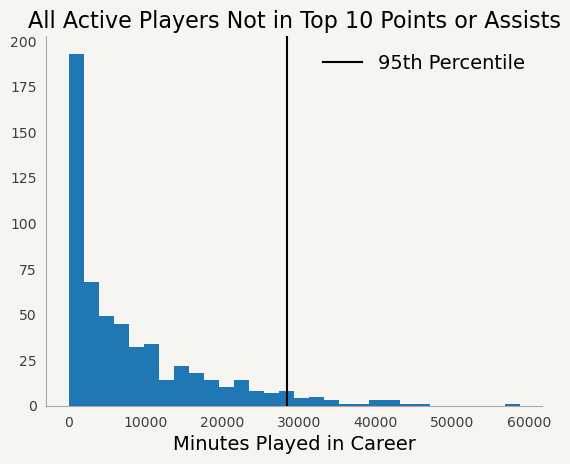

In [53]:
# Get points and assists from top 10% of non leaders
minutes = [sublist[0] for sublist in minutesPointsAssists]
threshold = np.percentile(minutes, 95)

fig, ax = plt.subplots()
ax.hist(minutes, bins=30)
ax.axvline(threshold, color="k", label="95th Percentile")
ax.legend(loc="best")
tidy_axes(ax)

ax.set_xlabel("Minutes Played in Career", fontsize=14)
ax.set_title("All Active Players Not in Top 10 Points or Assists", fontsize=16)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
plt.savefig("../images/minutes_played_all_players.png")

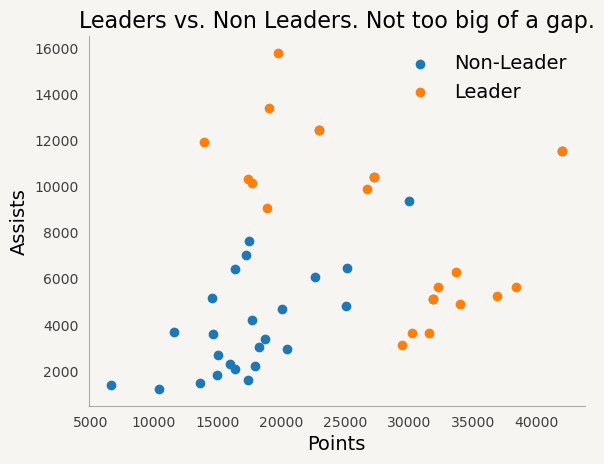

In [54]:


top10 = np.array([sublist for sublist in minutesPointsAssists if sublist[0] > threshold])
leaders = np.array(minutesPointsAssistsLeaders)
fig, ax = plt.subplots()

ax.scatter(top10[:,1], top10[:,2], label="Non-Leader")
ax.scatter(leaders[:,1], leaders[:,2], label="Leader")
tidy_axes(ax)

ax.set_xlabel("Points", fontsize=labelsize)
ax.set_ylabel("Assists", fontsize=labelsize)
ax.set_title("Leaders vs. Non Leaders. Not too big of a gap.", fontsize=titlesize)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
plt.savefig("../images/pts_asts_scatter.png")
plt.show()

In [55]:
pointsArray = np.concatenate((top10[:,1], leaders[:,1]))
assistsArray = np.concatenate((top10[:,2], leaders[:,2]))

ptsAsts = pd.DataFrame(np.array([pointsArray, assistsArray]).T, columns=["Points", "Assists"])

# Normalize it
scaler = StandardScaler()
ptsAsts = pd.DataFrame(scaler.fit_transform(ptsAsts), columns=ptsAsts.columns)


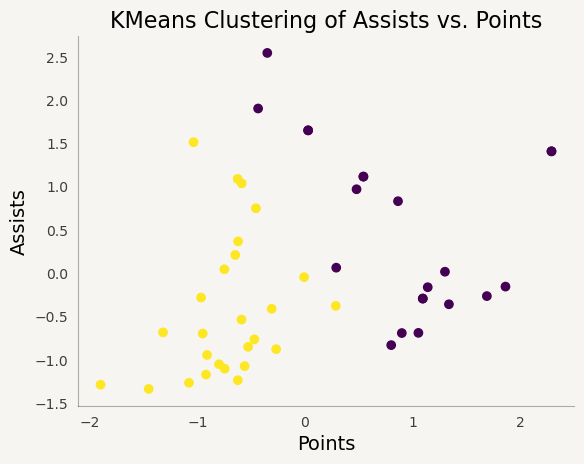

In [56]:
fig, ax = plt.subplots()


kmeans = KMeans(n_clusters=2)
kmeans.fit(ptsAsts)

ax.scatter(ptsAsts["Points"], ptsAsts["Assists"], c=kmeans.labels_)

tidy_axes(ax)
ax.set_title("KMeans Clustering of Assists vs. Points", fontsize=titlesize)
ax.set_xlabel("Points", fontsize=14)
ax.set_ylabel("Assists", fontsize=14)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
plt.savefig("../images/kmeans.png")
plt.show()